
# Analisis Data Covid-19
## Linear Regression & Statistical Prediction

Memanggil library yang di butuhkan dalam Proses Analisis
1. Mengimpor Pandas untuk manipulasi dan analisis data berbasis tabel.
2. Mengimpor NumPy untuk komputasi numerik, seperti operasi array dan matriks.
3. Mengimpor Matplotlib untuk membuat visualisasi data seperti grafik dan plot.
4. Mengimpor Seaborn untuk membuat visualisasi data statistik yang lebih menarik dan informatif.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Mengimpor fungsi datetime dan timedelta untuk menangani operasi terkait waktu dan tanggal.
2. Mengimpor fungsi untuk membagi dataset menjadi set pelatihan (training) dan pengujian (testing).
3. Mengimpor metrik untuk mengevaluasi performa model, seperti Mean Squared Error (MSE) dan R-squared (R²).
4. Mengimpor fungsi untuk melakukan fitting kurva non-linear terhadap data.

In [2]:
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

Selanjutnya memanggil dataset yang kita butuhkan ke dalam pemrograman Python menggunakan 3 buah dataset yaitu 
1. Kasus yang terkonfirmasi Covid 
2. Pasien  
3. Provinsi yang terkena Covid.

In [3]:
dataPasien = pd.read_csv ("patient.csv")
dataTerkonfirmasi = pd.read_csv ("confirmed_acc.csv")
Provinsi = pd.read_csv ("province.csv",encoding = 'unicode_escape')

print (dataPasien.head())
print (dataTerkonfirmasi.head())
print (Provinsi.head())

   patient_id  gender   age nationality     province current_state  \
0           1  female  31.0   indonesia  DKI Jakarta      released   
1           2  female  64.0   indonesia  DKI Jakarta      released   
2           3  female  33.0   indonesia  DKI Jakarta      released   
3           4  female  34.0   indonesia  DKI Jakarta      isolated   
4           5    male  55.0   indonesia  DKI Jakarta      isolated   

   contacted_with confirmed_date released_date deceased_date  \
0             NaN       2-Mar-20     13-Mar-20           NaN   
1             1.0       2-Mar-20     16-Mar-20           NaN   
2             1.0       6-Mar-20     13-Mar-20           NaN   
3             1.0       6-Mar-20           NaN           NaN   
4             1.0       8-Mar-20           NaN           NaN   

               hospital  
0  RSPI Sulianti Saroso  
1  RSPI Sulianti Saroso  
2  RSPI Sulianti Saroso  
3  RSPI Sulianti Saroso  
4       RS Persahabatan  
        date  cases
0  1/22/2020      

Rumusan Masalah

1. Kita ingin melihat banyak kasus terkonvirmasi covid-19

In [4]:
dataTerkonfirmasi.head()

,date,cases
0,1/22/2020,0
1,1/23/2020,0
2,1/24/2020,0
3,1/25/2020,0
4,1/26/2020,0


2. Cek data Covid yang belum terkonfirmasi atau mulai adanya kasus Covid tersebut. 
- Disini kita mengurutkan data tersebut berdasarkan tanggal paling terbaru  
- menampilkan 5 Data pertama dari data Covid yang belum terkonfirmasi.

In [5]:
(dataTerkonfirmasi[dataTerkonfirmasi['cases'] == 0].sort_values(by=['date'], ascending=False)).head()

,date,cases
39,3/1/2020,0
18,2/9/2020,0
17,2/8/2020,0
16,2/7/2020,0
15,2/6/2020,0


Selanjutnya kita konversi data tanggal tersebut menjadi total hari. Disini kita mengambil data tanggal awal yaitu 1 Maret 2020.

In [6]:
df = dataTerkonfirmasi.iloc[39:]
df['days']= df['date'].map(lambda x : (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime("3/1/2020", '%m/%d/%Y')).days)
df[['date','days','cases']] #reorder column

C:\Users\HP\AppData\Local\Temp\ipykernel_12440\4188260665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days']= df['date'].map(lambda x : (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime("3/1/2020", '%m/%d/%Y')).days)


,date,days,cases
39,3/1/2020,0,0
40,3/2/2020,1,2
41,3/3/2020,2,2
42,3/4/2020,3,2
43,3/5/2020,4,2
44,3/6/2020,5,4
45,3/7/2020,6,4
46,3/8/2020,7,6
47,3/9/2020,8,19
48,3/10/2020,9,27


Lalu kita buat sebuah function atau method untuk proses prediksi data Covid-19 yang kita miliki. Disini kita menggunakan library bawaan dari Python ini sendiri tetapi disini kita menentukan nilai parameter yang kita gunakan seperti ini.

 Kode ini akan memprediksi nilai pertumbuhan kasus menggunakan fungsi Gompertz, dengan fitting kurva untuk menyesuaikan parameter berdasarkan data pelatihan, lalu memperpanjang prediksi ke hari-hari mendatang.

In [7]:
def gompertz(a, c, t, t_0):
    Q = a * np.exp(-np.exp(-c*(t-t_0)))
    return Q

x = list(df['days'])
y = list(df['cases'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9, test_size=0.1, shuffle=False)
x_test_added = x_test + list(range((max(x_test)+1), 60))
popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([100, 0, 0],[6*max(y_train),0.15, 70]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train+x_test_added, estimated_t_0)

y_pred

C:\Users\HP\AppData\Local\Temp\ipykernel_12440\3805879261.py:2: RuntimeWarning: overflow encountered in exp
  Q = a * np.exp(-np.exp(-c*(t-t_0)))


array([6.94453422e-03, 1.88295098e-02, 4.75043830e-02, 1.12095671e-01,
       2.48600952e-01, 5.20501753e-01, 1.03312552e+00, 1.95151092e+00,
       3.52071069e+00, 6.08657931e+00, 1.01143448e+01, 1.62018648e+01,
       2.50845667e+01, 3.76297134e+01, 5.48187449e+01, 7.77178331e+01,
       1.07438219e+02, 1.45089136e+02, 1.91726984e+02, 2.48304767e+02,
       3.15625683e+02, 3.94304201e+02, 4.84737062e+02, 5.87085640e+02,
       7.01270050e+02, 8.26974448e+02, 9.63662219e+02, 1.11059925e+03,
       1.26688317e+03, 1.43147639e+03, 1.60324086e+03, 1.78097279e+03,
       1.96343565e+03, 2.14939045e+03, 2.33762249e+03, 2.52696388e+03,
       2.71631192e+03, 2.90464320e+03, 3.09102366e+03, 3.27461503e+03,
       3.45467801e+03, 3.63057262e+03, 3.80175640e+03, 3.96778061e+03,
       4.12828520e+03, 4.28299265e+03, 4.43170126e+03, 4.57427802e+03,
       4.71065131e+03, 4.84080382e+03, 4.96476551e+03, 5.08260702e+03,
       5.19443348e+03, 5.30037872e+03, 5.40060007e+03, 5.49527359e+03,
      

Sekarang kita gambarkan data hasil prediksi tadi ke dalam Grafik / Plot. Disini kita membandingkan antara nilai prediksi dengan data aktual yang terjadi.

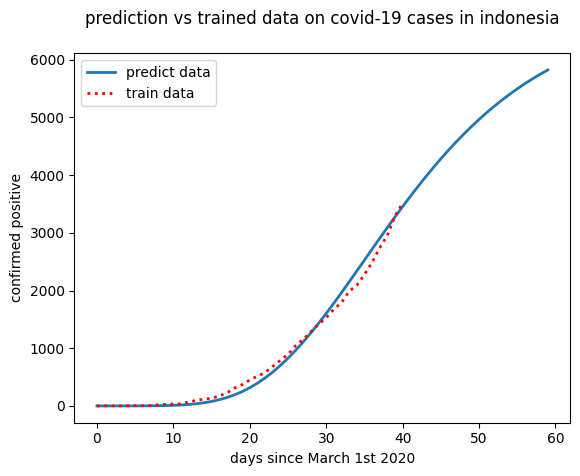

In [8]:
plt.plot(x_train+x_test_added, y_pred, linewidth=2, label='predict data') 
plt.plot(x, y, linewidth=2, color='r', linestyle='dotted', label='train data')
# plt.plot(x_test, y_test, linewidth=2, color='g', linestyle='dotted', label='test data')
plt.title('prediction vs trained data on covid-19 cases in indonesia\n')
plt.xlabel('days since March 1st 2020')
plt.ylabel('confirmed positive')
plt.legend(loc='upper left')

# Interpretasi Gambar
Grafik menunjukkan hasil prediksi pertumbuhan kasus COVID-19 di Indonesia menggunakan model Gompertz. Garis biru mewakili data prediksi, sedangkan titik merah (dotted line) adalah data pelatihan. Grafik menunjukkan kecocokan yang baik antara prediksi dan data pelatihan hingga hari terakhir data pelatihan, dengan model yang terus memperkirakan pertumbuhan hingga hari ke-60. Pola menunjukkan pertumbuhan logistik dengan laju peningkatan yang melambat mendekati kapasitas maksimum sekitar 6000 kasus.

Kita juga dapat melihat hasil data prediksi Covid-19 tadi ke dalam bentuk tabel. Disini kita melihat hasil prediksi Covid-19 60 Hari ke depannya.

In [9]:
prediksi = pd.DataFrame({'day_pred': x_test_added, 'cases_pred':np.around(y_pred[36:])})
prediksi

,day_pred,cases_pred
0,36,2716.0
1,37,2905.0
2,38,3091.0
3,39,3275.0
4,40,3455.0
5,41,3631.0
6,42,3802.0
7,43,3968.0
8,44,4128.0
9,45,4283.0


Visualisasi Data Pasien

Pertama-tama kita cek terlebih dahulu 5 data pertama dari dataset Pasien tersebut.

In [10]:
dataPasien.head()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


1. Selanjutnya kita lihat informasi dari dataset ini seperti banyaknya data dan kolom yang digunakan pada dataset ini.
2. Kita hitung banyaknya kelompok data berdasarkan kolom current_state.
3. Lalu hitung rata-rata umur berdasarkan kolom gender atau jenis kelamin dari pasien yang ada pada dataset tersebut.


In [11]:
dataPasien.info()
dataPasien['current_state'].value_counts()

male = dataPasien.loc[dataPasien['gender']=='male','age'].mean()
female = dataPasien.loc[dataPasien['gender']=='female','age'].mean()
print('Distribusi rata-rata umur pasien laki-laki: %i' %male, 'tahun')
print('Distribusi rata-rata umur pasien perempuan: %i' %female, 'tahun')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      893 non-null    int64  
 1   gender          156 non-null    object 
 2   age             156 non-null    float64
 3   nationality     156 non-null    object 
 4   province        156 non-null    object 
 5   current_state   166 non-null    object 
 6   contacted_with  27 non-null     float64
 7   confirmed_date  893 non-null    object 
 8   released_date   5 non-null      object 
 9   deceased_date   4 non-null      object 
 10  hospital        17 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ KB
Distribusi rata-rata umur pasien laki-laki: 48 tahun
Distribusi rata-rata umur pasien perempuan: 47 tahun


Visualisasi Data
1.  grafik banyaknya pasien berdasarkan kolom current_state.
2. Disini kita gambarkan juga grafik untuk melihat data berdasarkan data gender dan data ini dihitung berdasarkan kolom current_state pasien.
3. Disini kita tampilkan grafik data pasien berdasarkan provinsi dari pasien tersebut.
4. Sekarang kita lihat banyaknya pasien yang positif Covid-19 beredasarkan tanggal terkonfirmasinya dan Data pasien ini ditampilkan dalam bentuk Grafik.

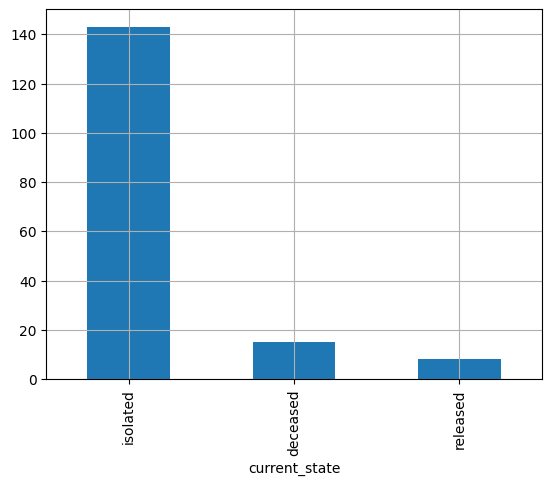

In [12]:
dataPasien.current_state.value_counts().plot.bar().grid()

# Interpretasi Gambar
Grafik batang menunjukkan distribusi status kasus COVID-19 berdasarkan kategori isolated, deceased, dan released. Mayoritas kasus berada dalam kategori isolated (sekitar 140 kasus), menunjukkan pasien yang masih dalam masa isolasi. Jumlah kasus dalam kategori deceased (meninggal) dan released (sembuh/dilepas) jauh lebih sedikit dibandingkan jumlah kasus isolated. Grafik ini mencerminkan proporsi kasus aktif yang masih tinggi dibandingkan dengan kasus sembuh atau meninggal.

<Axes: xlabel='gender', ylabel='count'>

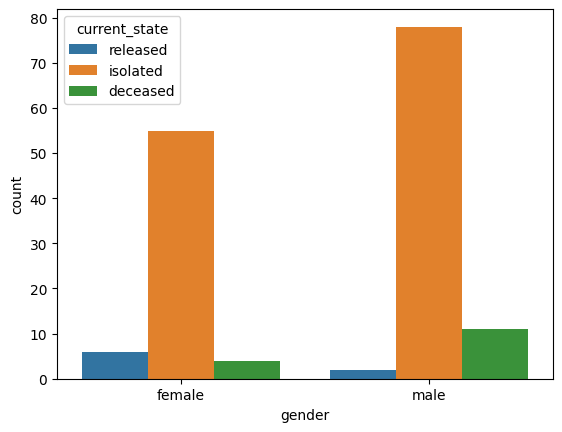

In [13]:
sns.countplot(x='gender', hue='current_state', data=dataPasien)

Grafik ini menunjukkan distribusi status kasus COVID-19 berdasarkan gender (laki-laki dan perempuan) dengan kategori released (sembuh), isolated (isolasi), dan deceased (meninggal).

1. Kategori Isolated: Mayoritas kasus pada kedua gender berada dalam status isolasi, dengan jumlah kasus laki-laki lebih tinggi daripada perempuan.
2. Kategori Released: Kasus sembuh pada kedua gender relatif rendah dibandingkan dengan isolasi.
3. Kategori Deceased: Kasus meninggal pada laki-laki dan perempuan hampir setara, tetapi jumlahnya jauh lebih kecil dibandingkan isolasi.

Kesimpulan: Kasus aktif (isolated) mendominasi untuk kedua gender, dengan laki-laki memiliki proporsi lebih tinggi secara keseluruhan. Kasus sembuh dan meninggal jauh lebih sedikit dibandingkan isolasi.

<Axes: xlabel='confirmed_date'>

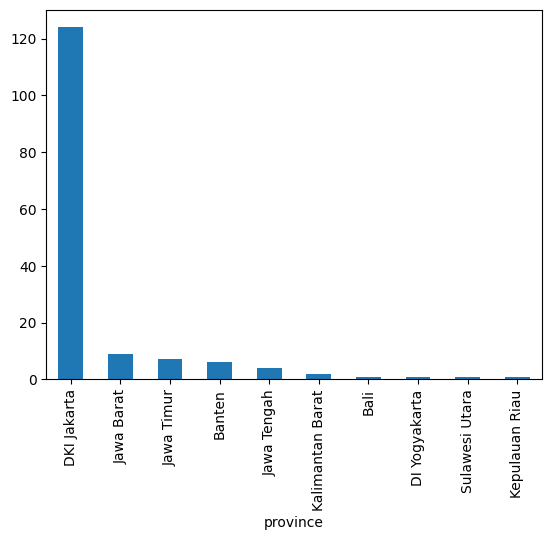

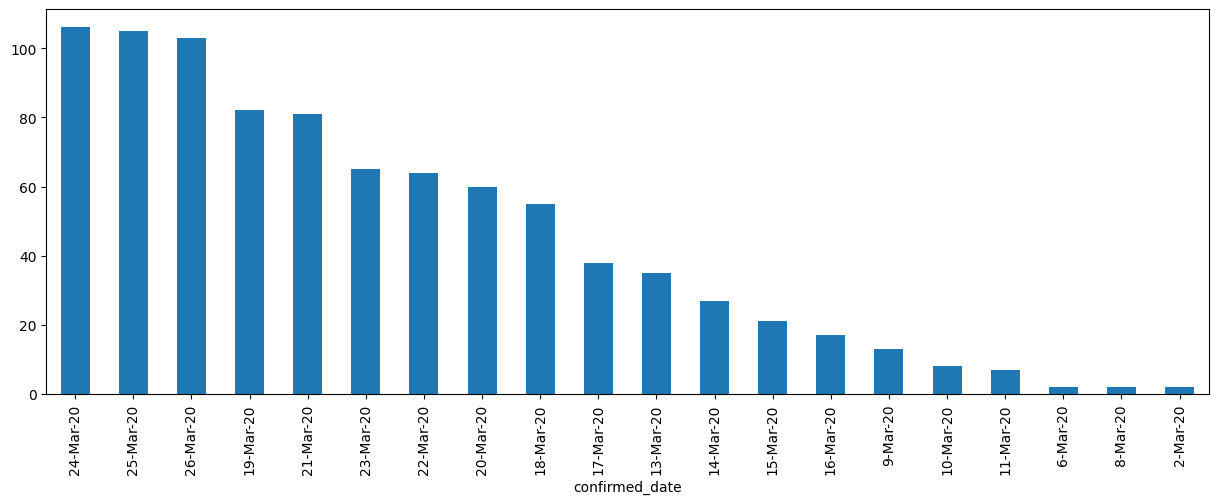

In [14]:
dataPasien.province.value_counts().plot.bar()

plt.figure(figsize=(15,5))
dataPasien.confirmed_date.value_counts().plot.bar()

Mengecek Data Provinsi

In [15]:
Provinsi.head(5)

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [16]:
print("Total Data : ", Provinsi.shape,"\n")
Provinsi.info()

Provinsi['island'].value_counts()

Total Data :  (35, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          35 non-null     int64 
 1   province_name        35 non-null     object
 2   island               35 non-null     object
 3   iso_code             35 non-null     object
 4   capital_city         35 non-null     object
 5   population           35 non-null     int64 
 6   population_kmsquare  35 non-null     int64 
 7   confirmed            35 non-null     int64 
 8   deceased             35 non-null     int64 
 9   released             35 non-null     int64 
 10  longitude            35 non-null     object
 11  latitude             35 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.4+ KB


island
Sumatra                    10
Jawa                        6
Sulawesi                    6
Kalimantan                  5
Kepulauan Nusa Tenggara     3
Kepulauan Maluku            2
Papua                       2
Unknown                     1
Name: count, dtype: int64

Deklarasikan sintak atau method yang digunakan untuk menghitung banyaknya jumlah korban yang terkonfirmasi Covid-19.

In [17]:
#----------Group By---------------
def FungsiGroup(column, ds):
  dataset = ds
  print((dataset.groupby(column).sum()[['confirmed']]).sort_values(by=column, ascending=False))

lihat pengelompokan banyaknya pasien yang terkonfirmasi berdasarkan pengelompokan kolom island.

In [18]:
FungsiGroup('island', Provinsi)

                         confirmed
island                            
Unknown                         20
Sumatra                         29
Sulawesi                        35
Papua                            7
Kepulauan Nusa Tenggara         11
Kepulauan Maluku                 2
Kalimantan                      22
Jawa                           911


Sintak dibawah ini digunakan untuk memasukkan data pengelompokan pasien yang terkonfirmasi tadi ke dalam variabel baru untuk proses perhitungan Linear Regresi.

In [19]:
df =  pd.DataFrame((Provinsi.groupby('island').sum()[['confirmed']]).sort_values(by='island', ascending=False))
df.head()

,confirmed
island,
Unknown,20
Sumatra,29
Sulawesi,35
Papua,7
Kepulauan Nusa Tenggara,11


Selanjutnya kita ubah dan hapus index dari kolom island tersebut dan simpan pada kolom island baru.

In [20]:
df['island']=df.index
df.reset_index(drop=True, inplace=True)


Lalu tampilkan data dari kolom island dan kolom confirmed serta tampilkan 5 data pertama dari kolom ini.

In [21]:
df = df[['island', 'confirmed']]
df.head()

,island,confirmed
0,Unknown,20
1,Sumatra,29
2,Sulawesi,35
3,Papua,7
4,Kepulauan Nusa Tenggara,11


Lalu kita Copy data dari dataset provinsi tadi ke dalam variabel baru. Disini kita hanya menggunakan beberapa kolom data saja.

In [29]:
dataset = Provinsi[['province_name', 'capital_city', 'population_kmsquare', 'confirmed', 'deceased']]
dataset.head()

,province_name,capital_city,population_kmsquare,confirmed,deceased
0,Aceh,Banda Aceh,86,4,0
1,Bali,Denpasar,738,9,2
2,Banten,Serang,1298,84,4
3,Bengkulu,Bengkulu,93,0,0
4,DI Yogyakarta,Yogyakarta,1134,22,2


Lalu kita cek banyaknya nilai null dari setiap kolom dari variabel yang baru saja di buat.

In [30]:
dataset.isnull().sum()

province_name          0
capital_city           0
population_kmsquare    0
confirmed              0
deceased               0
dtype: int64

LINEAR REGRESI DATASET PROVINSI


In [33]:
dtLR = dataset.copy()
print(dtLR.shape)
dtLR.head()

(35, 5)


,province_name,capital_city,population_kmsquare,confirmed,deceased
0,Aceh,Banda Aceh,86,4,0
1,Bali,Denpasar,738,9,2
2,Banten,Serang,1298,84,4
3,Bengkulu,Bengkulu,93,0,0
4,DI Yogyakarta,Yogyakarta,1134,22,2


Lalu kita lihat nilai korelasi setiap kolom yang ada pada variabel yang kita gunakan ini.

In [43]:
dataset = dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [45]:
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])

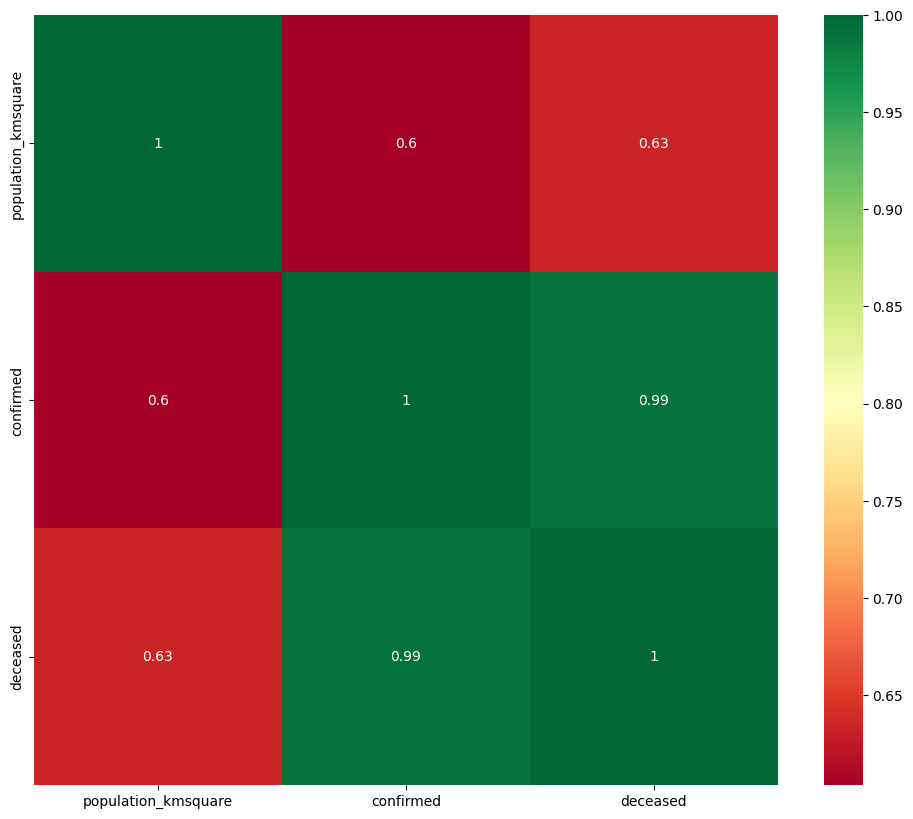

In [46]:
plt.figure(figsize=(12,10))
p = sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

## Interpretasi Gambar
1. Hubungan Population_kmsquare dengan Confirmed (0.6): Hubungan positif sedang, menunjukkan bahwa daerah dengan populasi lebih padat cenderung memiliki lebih banyak kasus yang dikonfirmasi.
1. Hubungan Population_kmsquare dengan Deceased (0.63): Hubungan positif sedang, menunjukkan populasi yang lebih padat sedikit berkorelasi dengan lebih banyak kasus kematian.
2. Hubungan Confirmed dengan Deceased (0.99): Hubungan sangat kuat, hampir sempurna, yang menunjukkan bahwa jumlah kasus terkonfirmasi sangat berkorelasi dengan jumlah kematian.

Kesimpulan: Daerah dengan populasi yang lebih padat cenderung memiliki lebih banyak kasus terkonfirmasi dan kematian, dengan hubungan yang paling kuat terlihat antara kasus terkonfirmasi dan kematian.

Sintak dibawah ini digunakn untuk menghapus kolom-kolom yang memiliki relasi paling kecil.

In [48]:
dtLR = dtLR.drop(['province_name','capital_city','population_kmsquare'], axis=1)
dtLR.head(5)

,confirmed,deceased
0,4,0
1,9,2
2,84,4
3,0,0
4,22,2


Lalu kita pisahkan data ke dalam variabel X dan Y untuk proses Analisa Linear Regresi.

In [49]:
#-----Proses linear regression
X_LR=dtLR.iloc[:, :-1].values
Y_LR=dtLR.iloc[:, 1].values

Sintak dibawah ini digunakan untuk mendefinisikan data testing dan training yang digunakan.

In [50]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_LR, Y_LR, test_size = 0.20, random_state = 0)

Deklarasikan sintak untuk linear regresi tersebut serta panggil data training yang digunakan.

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_1, y_train_1)

LinearRegression()

Sintak dibawah ini digunakan untuk melakukan proses prediksi data testing yang kita gunakan.

In [52]:
pred = regressor.predict(X_test_1)

Lalu kita gambarkan sebaran data dan hubungan antar kolom dari kolom confirmed dan deceased.

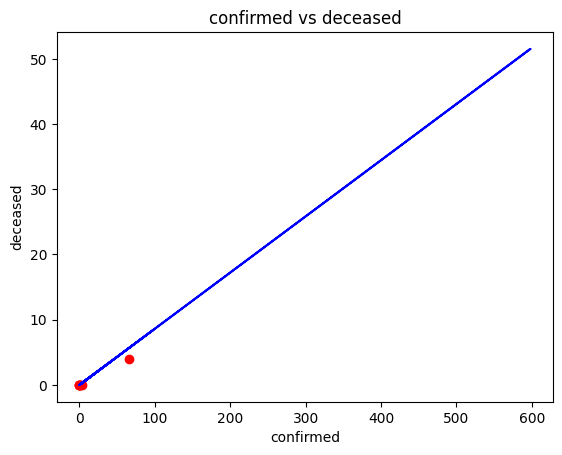

In [56]:
plt.scatter(X_test_1, y_test_1, color = 'red')
plt.plot(X_train_1, regressor.predict(X_train_1), color = 'blue' )
plt.title('confirmed vs deceased')
plt.xlabel('confirmed')
plt.ylabel('deceased')
plt.show()

1. Hubungan Linear: Garis biru menunjukkan hubungan linear antara jumlah kasus yang dikonfirmasi dan jumlah kematian, dengan kematian meningkat seiring dengan bertambahnya kasus terkonfirmasi.
2. Titik Data: Titik merah merepresentasikan data sebenarnya, yang umumnya mengikuti pola garis linear, menegaskan korelasi yang kuat antara kedua variabel.
3. Korelasi Kuat: Pola ini mendukung temuan sebelumnya bahwa jumlah kasus terkonfirmasi hampir selalu berkorelasi dengan jumlah kematian secara proporsional.

Kesimpulan: Jumlah kasus yang dikonfirmasi sangat berkorelasi dengan jumlah kematian, mencerminkan bahwa peningkatan kasus aktif dapat langsung berdampak pada angka kematian.

## Penjelasan
**Tujuan yang Ingin Dicapai**:
1. Analisis Korelasi: Mengidentifikasi hubungan antara variabel seperti jumlah kasus terkonfirmasi, kematian, dan populasi untuk memahami pola penyebaran COVID-19.
2. Segmentasi Data: Mengelompokkan kasus berdasarkan atribut tertentu (gender, status kasus) untuk memahami distribusi populasi yang terpengaruh.
3. Prediksi dan Tren: Memproyeksikan pertumbuhan kasus menggunakan model matematis seperti Gompertz untuk memprediksi perkembangan di masa depan.
4. Visualisasi Data: Menyampaikan pola dan hubungan data melalui grafik untuk mempermudah pemahaman dan pengambilan keputusan.

**Kesimpulan Akhir**:
1. Populasi Berdampak: Kasus aktif (isolated) mendominasi baik pada laki-laki maupun perempuan, dengan jumlah kasus pada laki-laki sedikit lebih tinggi.
2. Korelasi Kuat: Terdapat hubungan linear yang kuat antara jumlah kasus terkonfirmasi dan kematian, menunjukkan bahwa peningkatan kasus aktif cenderung meningkatkan angka kematian.
3. Faktor Populasi: Kepadatan populasi memiliki hubungan moderat dengan jumlah kasus terkonfirmasi dan kematian, mengindikasikan bahwa daerah padat penduduk lebih rentan terhadap penyebaran COVID-19.
4. Model Prediksi: Pertumbuhan kasus mengikuti pola logistik, dengan laju peningkatan melambat mendekati kapasitas maksimum.
5. Visualisasi Data: Semua grafik membantu mengidentifikasi pola distribusi, korelasi, dan tren yang penting untuk memantau dan memitigasi dampak pandemi.

**Kesimpulan Akhir**: Analisis ini membantu memahami pola penyebaran COVID-19, faktor risiko seperti populasi padat, dan menyediakan proyeksi tren kasus yang dapat digunakan sebagai dasar pengambilan kebijakan mitigasi dan pencegahan.